   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


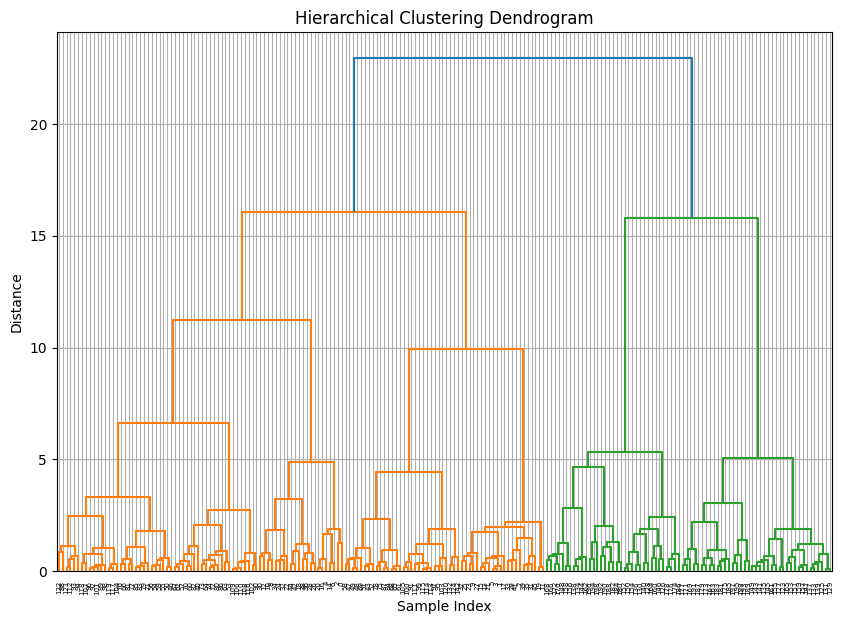

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1   19                  15                      39        1
1           2   21                  15                      81        2
2           3   20                  16                       6        1
3           4   23                  16                      77        2
4           5   31                  17                      40        1


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
data = pd.read_csv("C:/Users/Admin/Documents/sakshiTY/Data Mining/assignmentNo6/customers.csv")
print(data.head())

# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Scale the data
data_scaled = StandardScaler().fit_transform(data_numeric)

# Generate linkage matrix for dendrogram
linked = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(data_scaled)

# Add cluster labels to original dataframe (only numeric columns here)
data_numeric['cluster'] = clusters

print(data_numeric.head())
